In [1]:
pip install pyaml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

In [3]:
%%writefile testutility.py
import logging
import os
import subprocess
import yaml 
import pandas as pd
import datetime
import gc
import re

#################
# File Reading #
#################

def read_config_file(filepath):
  with open(filepath, "r") as stream:
    try:
      return yaml.safe_load(stream)
    except yaml.YAMLError as exc:
      logging.error(exc)


Overwriting testutility.py


In [4]:
%%writefile file.yaml
file_type: csv
dataset_name: testfile
file_1_name: bank-full
file_2_name: bank-additional-full
table_name: edsurv
inbound_delimeter: ";"
outbound_delimeter: "|"
skip_leading_rows: 1

Overwriting file.yaml


In [5]:
# Read Config file
import testutility as util
config_data = util.read_config_file("file.yaml")

In [6]:
# read the files using config file
file_type = config_data["file_type"]
source_file_1 = "./" + config_data["file_1_name"] + f".{file_type}"
source_file_2 = "./" + config_data["file_2_name"] + f".{file_type}"

# print("", source_file)
df1 = pd.read_csv(source_file_1, config_data["inbound_delimeter"])
df2 = pd.read_csv(source_file_2, config_data["inbound_delimeter"])

C:\Users\Taimoor Razi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Taimoor Razi\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
df1.shape

(45211, 17)

In [8]:
df2.shape

(41188, 21)

In [9]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
import os
def summary(df, source_file):
    rows = len(df)
    columns = len(df.columns)
    print(f"Number of Rows: {rows}")
    print(f"Number of Columns: {columns}")
    file_size = os.path.getsize(source_file)
    print(f"Size: {file_size} bytes")

In [12]:
summary(df1, source_file_1)

Number of Rows: 45211
Number of Columns: 17
Size: 4610348 bytes


In [13]:
summary(df2, source_file_2)

Number of Rows: 41188
Number of Columns: 21
Size: 5834924 bytes


In [14]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
df2.duplicated().sum()

12

In [17]:
df2 = df2.drop_duplicates()

In [18]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [19]:
# df = df1.merge(df2, on = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "campaign", "pdays", "poutcome", "previous", "duration", "y"], how="outer")

In [20]:
df = df1.append(df2)

C:\Users\Taimoor Razi\AppData\Local\Temp\ipykernel_14068\281634162.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [21]:
df.shape

(86387, 23)

In [22]:
df.duplicated().sum()

0

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'day_of_week', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df["balance"].head(20)

0     2143.0
1       29.0
2        2.0
3     1506.0
4        1.0
5      231.0
6      447.0
7        2.0
8      121.0
9      593.0
10     270.0
11     390.0
12       6.0
13      71.0
14     162.0
15     229.0
16      13.0
17      52.0
18      60.0
19       0.0
Name: balance, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86387 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             86387 non-null  int64  
 1   job             86387 non-null  object 
 2   marital         86387 non-null  object 
 3   education       86387 non-null  object 
 4   default         86387 non-null  object 
 5   balance         45211 non-null  float64
 6   housing         86387 non-null  object 
 7   loan            86387 non-null  object 
 8   contact         86387 non-null  object 
 9   day             45211 non-null  float64
 10  month           86387 non-null  object 
 11  duration        86387 non-null  int64  
 12  campaign        86387 non-null  int64  
 13  pdays           86387 non-null  int64  
 14  previous        86387 non-null  int64  
 15  poutcome        86387 non-null  object 
 16  y               86387 non-null  object 
 17  day_of_week     41176 non-null 

In [25]:
df.isna().sum()

age                   0
job                   0
marital               0
education             0
default               0
balance           41176
housing               0
loan                  0
contact               0
day               41176
month                 0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
y                     0
day_of_week       45211
emp.var.rate      45211
cons.price.idx    45211
cons.conf.idx     45211
euribor3m         45211
nr.employed       45211
dtype: int64

<AxesSubplot:>

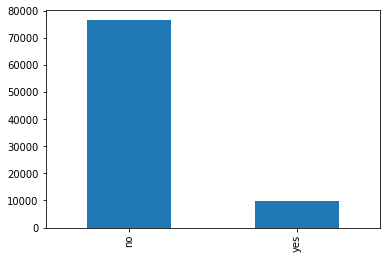

In [29]:
df["y"].value_counts().plot(kind="bar")

<AxesSubplot:>

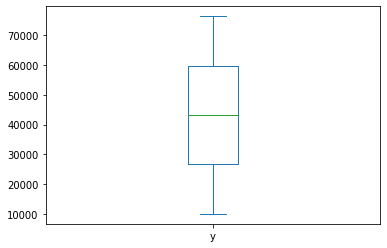

In [30]:
df["y"].plot(kind="bar")

In [26]:
df.to_csv("bank_data.csv")

In [27]:
import zipfile

list_files = ['file.yaml', 'testutility.py', 'Data Injestion Pipeline.ipynb', "bank-full.csv", "bank-additional-full.csv", "bank_data.csv"]

with zipfile.ZipFile('final.zip', 'w') as zipF:
    for file in list_files:
        zipF.write(file, compress_type=zipfile.ZIP_DEFLATED)